In [2]:
%%javascript

alert("Command below for displays that suports Full HD")
//var person = prompt("Type y for Full HD experience", "y/n");
//if(person == y){}

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important;}</style>"))

# Import Librarys

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
# Make plots bigger again
#plt.rcParams['figure.figsize'] = [17, 8]

plt.rcParams['figure.figsize'] = [17*2, 8*2]

In [7]:
import cv2

In [8]:
import matplotlib.image as mpimg 

In [9]:
import sys

# List files in the . path

In [10]:
%ls .

'Notes from final project'/      'Primeiros Passos.ipynb'*
'Notes from final project.zip'*   Projeto.ipynb*
 orl_faces/                       Projeto-Limpo.ipynb*
 orl_faces.zip*                   README.md*
 plot_regression.ipynb*


# Analisando as pastas


In [11]:
%ls orl_faces/orl_faces/

s1/   s13/  s17/  s20/  s24/  s28/  s31/  s35/  s39/  s6/
s10/  s14/  s18/  s21/  s25/  s29/  s32/  s36/  s4/   s7/
s11/  s15/  s19/  s22/  s26/  s3/   s33/  s37/  s40/  s8/
s12/  s16/  s2/   s23/  s27/  s30/  s34/  s38/  s5/   s9/


In [12]:
%ls orl_faces/orl_faces/s1

10.pgm*  1.pgm*  2.pgm*  3.pgm*  4.pgm*  5.pgm*  6.pgm*  7.pgm*  8.pgm*  9.pgm*


#  Criar o Conjunto de Dados

## Conjunto de pessoas 

In [13]:
# Tem todas as pessoas 
people = list()

# For para cada pessoa
for j in range(1, 41):
    # For para cada imagem
    for i in range(1, 11):
        people.append(np.array(cv2.imread('./orl_faces/orl_faces/s' + str(j) + '/' + str(i) +'.pgm',0)))

In [14]:
len(people)

400

## Conjunto de labels (etiquetas) indicando a quem foto pertence a quem

In [18]:
people_labels = list()

for i in range(40):
    for j in range(10):
        people_labels.append(i)

print(people_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27,

# Pré-Processamento

### 1 -> Calcular a transformada bidimensional de todas as imagens

In [35]:
people_fft = list()

for image in people:
    # Fourier Bidimensional Tranform
    people_fft.append(np.fft.fft2(image))

### 2 -> _Shiftar_ a tranformada de Fourier

In [36]:
people_fft_shift = list()

for image_fft in people_fft:
    people_fft_shift.append(np.fft.fftshift(image_fft))

In [37]:
len(people_fft), len(people_fft_shift)

(400, 400)

# Funçao para cortar imagem

# Separar em conjunto de teste e universo
(entenda universo como o conjunto de dados onde tem as (400 - 40) fotos)

In [66]:
people_teste = list()

for i in range(0, len(people_fft_shift), 10):
    people_teste.append(people_fft_shift[i])

for i in range(0, len(people_fft_shift), 10):
    people_fft_shift.remove()


TypeError: remove() takes exactly one argument (0 given)

In [54]:
len(people_teste), len(people_fft_shift)

(40, 400)

In [65]:
a = [i for i in range(400)]

for i in range(0, len(a), 10):
    print(a[i])
    print(a.remove,)
    
print(a, len(a))

0
<built-in method remove of list object at 0x7f5169d57348>
10
<built-in method remove of list object at 0x7f5169d57348>
20
<built-in method remove of list object at 0x7f5169d57348>
30
<built-in method remove of list object at 0x7f5169d57348>
40
<built-in method remove of list object at 0x7f5169d57348>
50
<built-in method remove of list object at 0x7f5169d57348>
60
<built-in method remove of list object at 0x7f5169d57348>
70
<built-in method remove of list object at 0x7f5169d57348>
80
<built-in method remove of list object at 0x7f5169d57348>
90
<built-in method remove of list object at 0x7f5169d57348>
100
<built-in method remove of list object at 0x7f5169d57348>
110
<built-in method remove of list object at 0x7f5169d57348>
120
<built-in method remove of list object at 0x7f5169d57348>
130
<built-in method remove of list object at 0x7f5169d57348>
140
<built-in method remove of list object at 0x7f5169d57348>
150
<built-in method remove of list object at 0x7f5169d57348>
160
<built-in metho

# Analizing Data

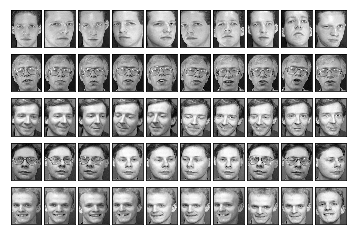

In [33]:
nrows, ncols = 5, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people[i-1 + j], cmap = 'gray')
        #plt.title('%s %s' %(i, j))
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

In [ ]:
people_np_array = np.array(people)
people_X_np_array = np.array(people_X)

In [ ]:
print(people_np_array.shape,people_X_np_array.shape)

In [ ]:
person = 39
image = 9

plt.imshow(np.reshape(people_np_array,(40,10,112,92))[person][image], cmap="gray" )
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
people_np_array_4d = np.reshape(people_np_array,(40,10,112,92))
#pd.DataFrame(people_np_array_4d)

# Starting the knn

In [ ]:
the_chosen_ones = list()

In [ ]:
from sklearn.model_selection import GroupKFold

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)

print("train \t   \t         test")
for train, test in gkf.split(X, y, groups=groups):
    print("%s   \t %s" % (train, test))

In [ ]:
from sklearn.model_selection import GroupKFold

X = people               #[0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = people_labels        #["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = people_labels   #[1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=40)

for train, test in gkf.split(X, y, groups=groups):
    print("Train %s" % (train))
    print("Test  %s" % (test))

Python Code
```
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
```

In [ ]:
X = people_np_array_4d  # sujeitos(40) * fotos(9) * x(92) * y(112)
y = people_labels       # [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

In [ ]:
print("img.shape", img.shape)
print("f.shape", f.shape)

# Starting the project

1. Declarar as variaveis e os parametros do sistema

    1.1 Largura e Altura da transformada com shift() de 2x2 á 30x30
    
    1.2 Melhor área
    
    1.3 Indice da foto a ser separada
    
2. Primeiro construir o conjunto de dados X que contém:
    
    9 fotos * 40 sujeitos
    
3. Y para o fit
    Coluna de label com a id de cada pessoal

4. Declarar o ponto (0,0) como 0 ou deixá-lo como valor inicial

5. Erro médio quadrático

   da imagem a ser classificadas
   das outras 9

6. Classificar


## Fluxo da aplicação

Primeiro criar o conjunto de dados 

In [ ]:
people_fft_shift_np = np.array(people_fft_shift)

In [ ]:
people_fft_shift_np.shape

In [ ]:
def cut_fft_shift(h, image):
    x = 92//2
    y = 112//2

    people_fft_shift_np_crop = list()
    print(x - (h//2), x + (h//2))
    print(y - (h//2), y + (h//2))
    for i in range(x - (h//2), x + (h//2)):
        for j in range(y - (h//2), y + (h//2)):
            people_fft_shift_np_crop.append(image[i][j])


    people_fft_shift_np_crop = np.array(people_fft_shift_np_crop).flatten()
    
    return people_fft_shift_np_crop

In [ ]:
cut_fft_shift(6, people_fft_shift_np[0]).real.shape

In [ ]:
img.shape

In [ ]:
plt.imshow(cut_fft_shift(50, img).reshape(50,50), cmap="gray")
plt.show()

In [ ]:
people_cropped = list()

for image in people_fft_shift_np:
    people_cropped.append(cut_fft_shift(14,image))

In [ ]:
people_cropped = np.array(people_cropped)

In [ ]:
people_cropped.shape